In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 导入数据
bf = pd.read_csv("BlackFriday.csv", header = 'infer')
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


# 4.二次探索数据

In [3]:
bf.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


4.3 居住时间与产品类型

In [4]:
# 随着居住时间的上升，各类型的产品呈怎样的趋势
bf_S1=bf.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

bf_S2=bf[bf["Product_Category_2"]>0]
bf_S2=bf_S2.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

bf_S3=bf[bf["Product_Category_3"]>0]
bf_S3=bf_S3.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum()

In [5]:
bf_S1

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64

In [6]:
bf_S2

Stay_In_Current_City_Years
0      496089993
1     1308685937
2      702408588
3      651721044
4+     573662882
Name: Purchase, dtype: int64

No handles with labels found to put in legend.


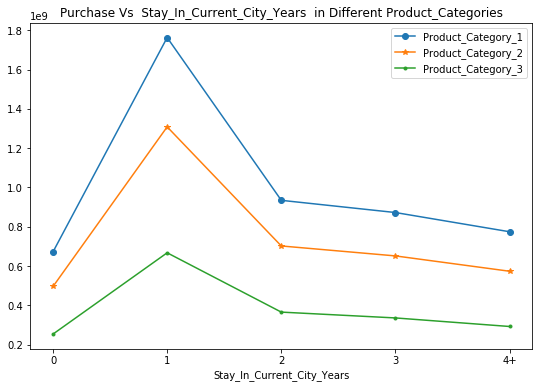

In [7]:
fig=plt.figure(figsize=(9,6));
ax=fig.add_subplot(1,1,1)
ticks=ax.set_xticklabels(['0','1','2','3','4+'])
ax.set_title("Purchase Vs  Stay_In_Current_City_Years  in Different Product_Categories")
ax.set_xlabel('Stay_In_Current_City_Years')
ax.legend(loc='best')
ax.plot(bf_S1,marker='o')
ax.plot(bf_S2,marker='*')
ax.plot(bf_S3,marker='.')
ax.legend(['Product_Category_1','Product_Category_2','Product_Category_3'])

可见，在居住时间为1年前，随着居住时间的上升，对三种产品类型的需求也上升；

在居住时间为1年后，随着居住时间为1年的上升，对三种产品类型的需求也逐步下降。

这也和 “年龄与产品类型需求图”相对应，居住1年的多为刚安定下来有较强购买需要的青中年


4.4 性别、婚姻状况与产品类型

In [ ]:
## 二次探索数据
# 哪种类型的产品对于男性和女性（未婚、已婚）来说，需求量更大?

In [8]:
bf.groupby(['Gender','Marital_Status'])['Purchase'].sum()

Gender  Marital_Status
F       0                  673815717
        1                  490808304
M       0                 2292473783
        1                 1560570574
Name: Purchase, dtype: int64

In [9]:
bf.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')

,Marital_Status,Purchase
Gender,,
F,0,673815717
F,1,490808304
M,0,2292473783
M,1,1560570574


In [10]:
bf_gen_mar_sum1 = bf.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')
bf_gen_mar_sum2 = bf[bf["Product_Category_2"]>0]
bf_gen_mar_sum2 = bf_gen_mar_sum2.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')
bf_gen_mar_sum3 = bf[bf["Product_Category_3"]>0]
bf_gen_mar_sum3 = bf_gen_mar_sum3.groupby(['Gender','Marital_Status'])['Purchase'].sum().reset_index('Marital_Status')

In [11]:
pd.concat([bf_gen_mar_sum1,bf_gen_mar_sum2,bf_gen_mar_sum3],axis=1)

,Marital_Status,Purchase,Marital_Status,Purchase,Marital_Status,Purchase
Gender,,,,,,
F,0,673815717,0,490531140,0,239137309
F,1,490808304,1,351631803,1,170432466
M,0,2292473783,0,1729333948,0,903950203
M,1,1560570574,1,1161071553,1,602126057


In [12]:
bf_gen_mar_sum = pd.concat([bf_gen_mar_sum1,bf_gen_mar_sum2,bf_gen_mar_sum3],axis=1)
bf_gen_mar_sum = bf_gen_mar_sum.drop(['Marital_Status'], axis=1)
bf_gen_mar_sum


,Purchase,Purchase,Purchase
Gender,,,
F,673815717,490531140,239137309
F,490808304,351631803,170432466
M,2292473783,1729333948,903950203
M,1560570574,1161071553,602126057


In [13]:
bf_gen_mar_sum.index=['Female_0','Female_1','Male_0','Male_1']

In [14]:
bf_gen_mar_sum


,Purchase,Purchase,Purchase
Female_0,673815717,490531140,239137309
Female_1,490808304,351631803,170432466
Male_0,2292473783,1729333948,903950203
Male_1,1560570574,1161071553,602126057


In [15]:
bf_gen_mar_sum.columns=['Product_Category_1','Product_Category_2','Product_Category_3']

In [16]:
bf_gen_mar_sum

,Product_Category_1,Product_Category_2,Product_Category_3
Female_0,673815717,490531140,239137309
Female_1,490808304,351631803,170432466
Male_0,2292473783,1729333948,903950203
Male_1,1560570574,1161071553,602126057


In [17]:
# 拼接数据框
bf_gen_mar_sum = pd.concat([bf_gen_mar_sum1,bf_gen_mar_sum2,bf_gen_mar_sum3],axis=1)
bf_gen_mar_sum = bf_gen_mar_sum.drop(['Marital_Status'], axis=1)
bf_gen_mar_sum.index=['Female_0','Female_1','Male_0','Male_1']
bf_gen_mar_sum.columns=['Product_Category_1','Product_Category_2','Product_Category_3']

bf_gen_mar_sum

,Product_Category_1,Product_Category_2,Product_Category_3
Female_0,673815717,490531140,239137309
Female_1,490808304,351631803,170432466
Male_0,2292473783,1729333948,903950203
Male_1,1560570574,1161071553,602126057


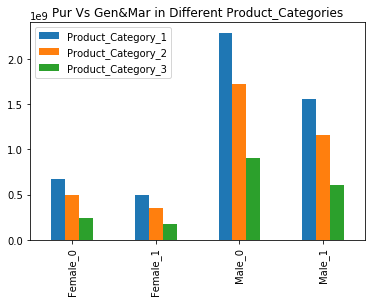

In [18]:
bf_gen_mar_sum.plot(kind='bar',title="Pur Vs Gen&Mar in Different Product_Categories")

In [ ]:
## 二次探索数据
# 不同城市对不同产品的需求

In [23]:
bf.groupby(['City_Category']).head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215


In [21]:
bf1_city_sum1 = bf.groupby(['City_Category'])['Product_Category_1'].sum()
bf1_city_sum2 = bf.groupby(['City_Category'])['Product_Category_2'].sum()
bf1_city_sum3 = bf.groupby(['City_Category'])['Product_Category_3'].sum()
bf1_city_sum1

City_Category
A     786402
B    1200508
C     859854
Name: Product_Category_1, dtype: int64

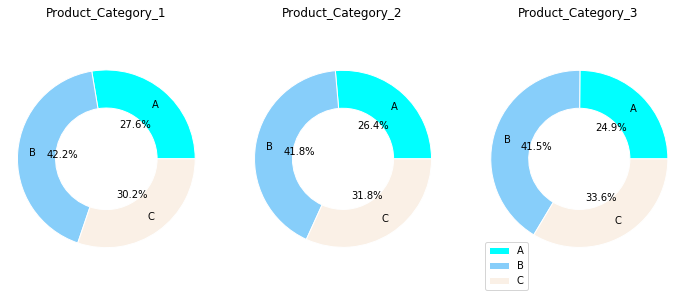

In [24]:
fig=plt.figure(figsize=(12,5));
# 图形位置与标题
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title('Product_Category_1')
ax2.set_title('Product_Category_2')
ax3.set_title('Product_Category_3')
# 作图
ax1.pie(bf1_city_sum1,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
ax2.pie(bf1_city_sum2,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
ax3.pie(bf1_city_sum3,radius=0.7,wedgeprops=dict(width=0.3,edgecolor='w'),colors=['cyan','lightskyblue','linen','yellow'],labels=['A','B','C'],labeldistance = 0.8,autopct='%1.1f%%',pctdistance = 0.5)
# 正圆与图例
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax3.legend(['A','B','C'])